# 통계 그래픽를 위한 high-level API

https://seaborn.pydata.org/tutorial/introduction.html#a-high-level-api-for-statistical-graphics

보고자하는 문제가 무엇이냐에 따라 최선의 시각화 방법이 달라지기 때문에 다양한 표현방법의 전환이 쉽도록 만든게 특징이라고 한다.

**`relplot()`**<br>
: relationships + plot <br>
통계적관계를 시각화하는 플롯, 대체로 산점도로 표현하지만 시간 변수일 경우는 선으로 표현하는 편이 더 직관적이다. <br>
라인그래프와 산점도그래프에서 size와 style의 적용방식이 다르니 유의하기

In [3]:
import seaborn as sns

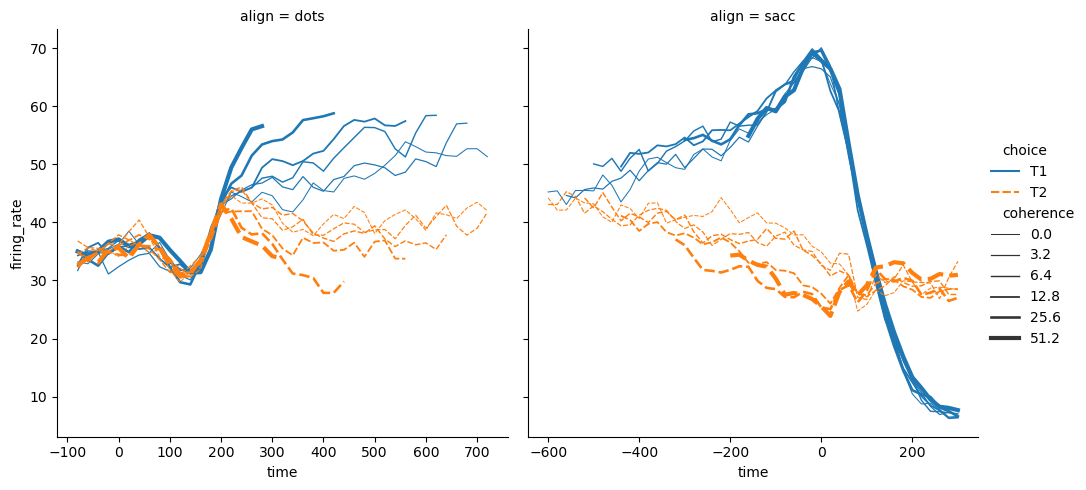

In [4]:
dots = sns.load_dataset("dots")
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)

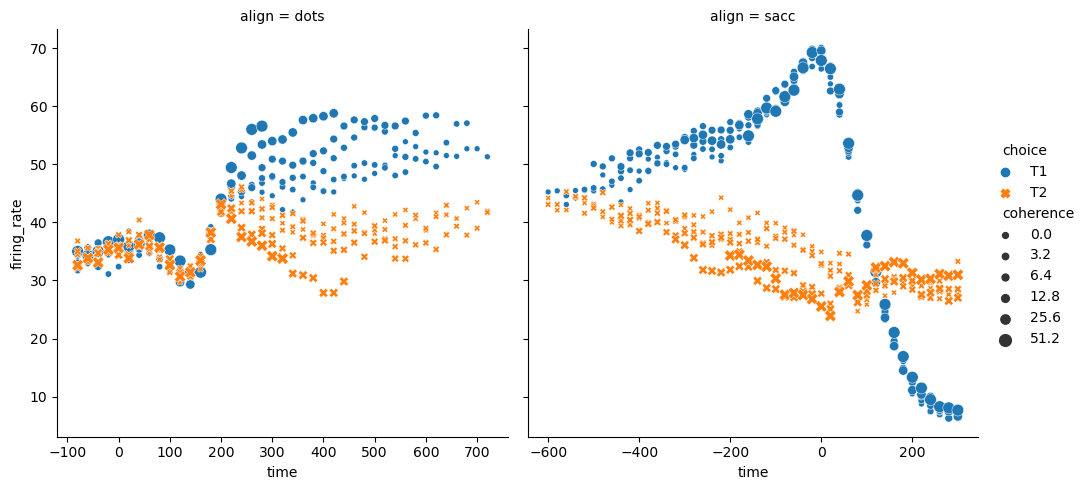

In [14]:
# 같은 데이터 산점도 방식으로 출력해보기
dots = sns.load_dataset("dots")
sns.relplot(
    data=dots,
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)

In [15]:
# 'dots' data_set 정보
print(dots.info())
dots.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   align        848 non-null    object 
 1   choice       848 non-null    object 
 2   time         848 non-null    int64  
 3   coherence    848 non-null    float64
 4   firing_rate  848 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 33.2+ KB
None


,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


## 통계적 추정

seaborn은 필요한 통계적 추정치를 자체적으로 자동연산한다.<br>
아래 그래프를 보면, 계산식을 따로 작성하지 않았지만 자체적으로 평균과 신뢰구간이 계산되어 그래프에 표현되어 있는 걸 볼 수 있다. <br>

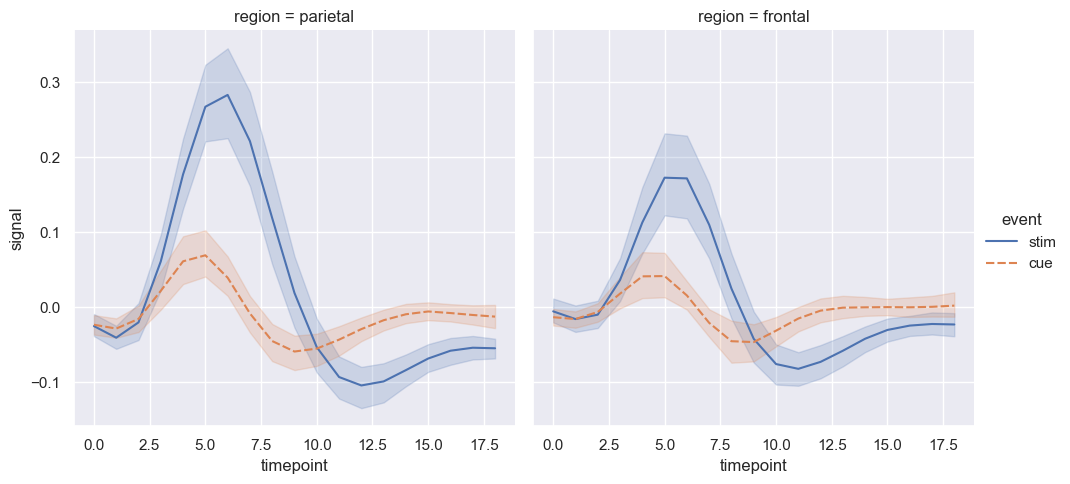

In [44]:
fmri = sns.load_dataset("fmri")
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)

이러한 통계적 추정은 기술통계 그 이상을 연산하기도 한다.(예 - lmplot()을 사용해 선형 회귀 모델을 포함한 산점도 표현)

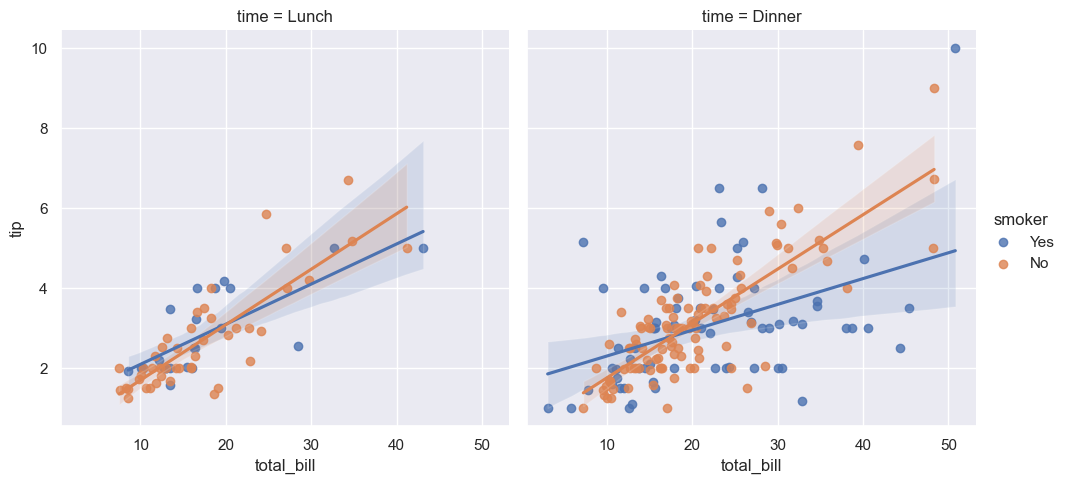

In [43]:
tips = sns.load_dataset("tips")

sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")

👻그럼 결국, 적절한 그래프만 선택하면 복잡한 계산 필요없이 자동으로 그래프 그려준다는 말이겠지? 메모리 많이 잡아먹고 느리겠지만..

In [19]:
# 'fmri' data_set 정보
print(fmri.info())
fmri.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB
None


,subject,timepoint,event,region,signal
563,s9,8,cue,parietal,-0.039841
495,s7,16,stim,frontal,0.014301
1057,s2,8,cue,frontal,-0.069666
285,s5,1,stim,frontal,-0.027179
453,s5,13,stim,frontal,-0.054614


## 분포 표현

**`displot()`**<br>
통계분석 시 데이터세트의 변수분포에 대해 알고 있어야하고, displot()은 그러한 분포를 다양한 방식으로 시각화하는 도구다. <br>
kind의 기본값은 histogram이며 추가적으로 kde와 ecdf를 선택할 수 있다.
* kde(kernel density estimation): 커널 밀도 추정. 밀도를 부드러운 곡선 형태의 라인그래프로 표현하는 것(히스토그램과 유사)
* ecdf(empirical cumulative distribution function): 경험적 누적 분포 함수. 데이터 분포의 적합성을 평가하거나 서로 다른 여러 표본 분포를 비교할 때 사용
    (ecdf 설명은 https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=jiehyunkim&logNo=220952781097 참고)

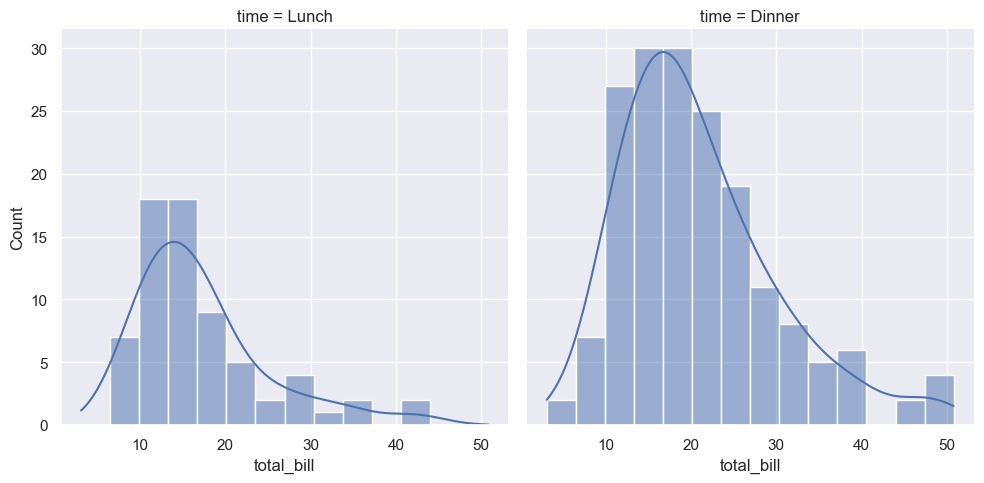

In [58]:
# 기본 히스토그램 그래프에 kde 그래프를 추가한 예제
sns.displot(data=tips, x="total_bill", col="time", kde=True)

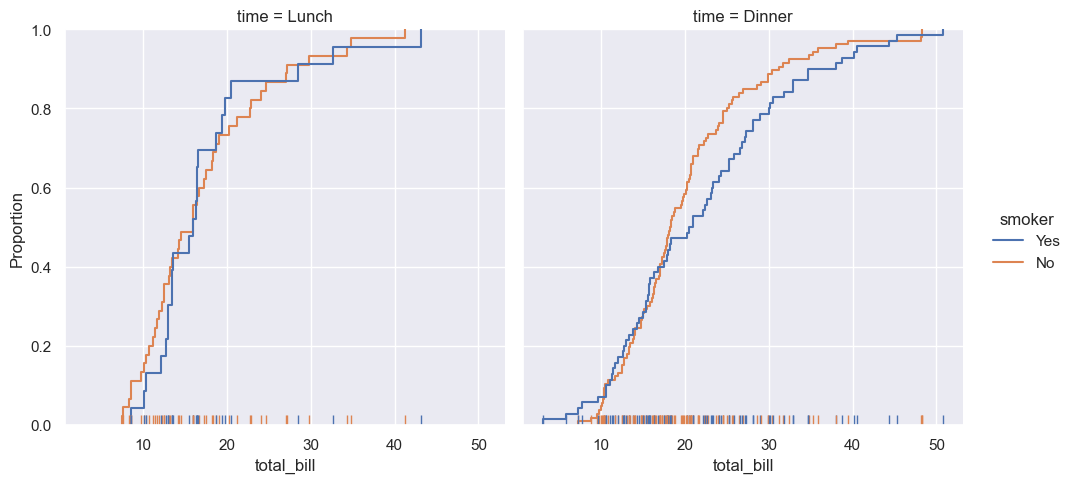

In [59]:
# ecdf(누적분포) 그래프에 rug 그래프를 추가한 예제
# rug그래프: 데이터의 위치를 x축 위에 1차원적으로 표현해 데이터의 위치와 분포를 표현하는 그래프
sns.displot(data=tips, kind="ecdf", x="total_bill", col="time", hue="smoker", rug=True)

## 범주형데이터 그래프

**`catplot()`**<br>
범주형 데이터를 시각화하는 데 중점을 둔 특수 플롯 유형 <br>
* swarm: 군집 그래프. 데이터를 전부 점으로 표현하며, 범주 축을 따라 점의 위치를 조정해 겹치지않게 그리는 산점도.<br>
    모든 관측값을 확인할 수 있으나 모든 점을 표현해야하기 때문에 연산이 굉장히 오래 걸림

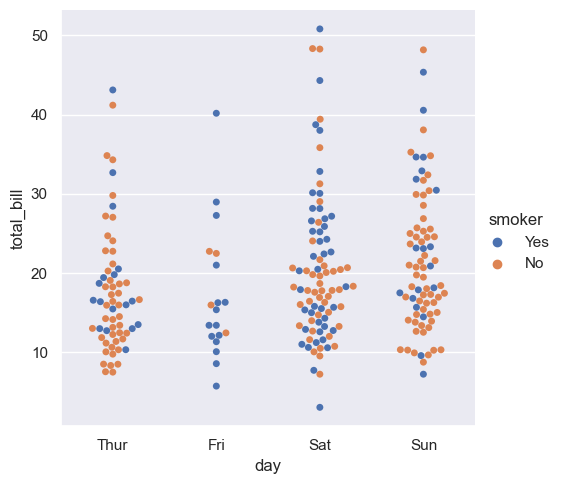

In [70]:
# kind 옵션: "strip"(기본값), "swarm", "box", "violin", "boxen", "point", "bar", or "count".
sns.catplot(data=tips, kind="swarm", x="day", y="total_bill", hue="smoker")

* violin: 박스플롯과 커널밀도추정곡선이 결합된 그래프. 가운데 흰 점과 까만 두꺼운 선이 박스 플롯이고, 옆을 그리고 있는 곡선이 커널밀도 곡선

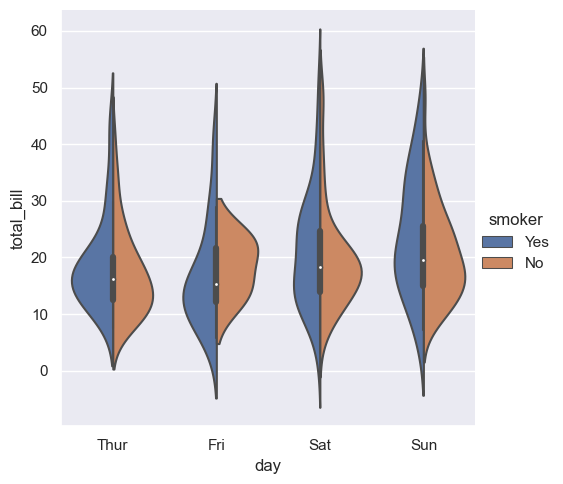

In [72]:
sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True)

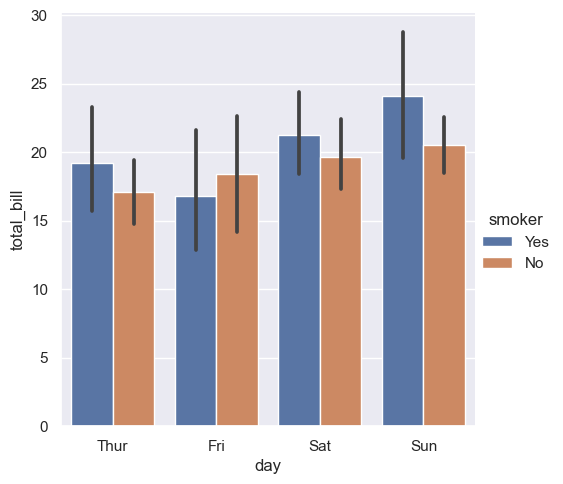

In [73]:
# 평균값(막대그래프) + 신뢰구간(까만 선) 을 표현한 그래프
# 신뢰구간은 errorbar 옵션으로 출력 선택
sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="smoker")

## <b><span style='color: #D60958'> 요약 </span></b>
나온 그래프 종류<br>
- relplot(): scatter, line<br>
- displot(): hist, kde, ecdf<br>
- catplot(): strip, swarm, box, violin, boxen, point, bar, count<br>
- (참고) lmplot()